In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Cargar datos
data = pd.read_csv('results_with_team_ids.csv')

# Caracteristicas y etiquetas que influiran en el modelo
features = data[['home_team_id', 'away_team_id']]
labels = data[['home_score', 'away_score']]

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo
model = Sequential()
model.add(Dense(128, input_dim=2, activation='relu'))  # Capa de entrada
model.add(Dropout(0.2))  # Dropout para regularización
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2))  # Salida con 2 neuronas para predecir home_score y away_score

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Resumen del modelo
model.summary()

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Guardar el modelo y el scaler
model.save('team_score_prediction_model.h5')
import joblib
joblib.dump(scaler, 'scaler.pkl')

# Evaluar el modelo
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f'Loss: {loss}, Mean Absolute Error: {mae}')


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               384       
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 2)                 34        
                                                                 
Total params: 11,282
Trainable params: 11,282
Non-trai

In [9]:
import joblib
from tensorflow.keras.models import load_model

# Cargar el modelo y el scaler
model = load_model('team_score_prediction_model.h5')
scaler = joblib.load('scaler.pkl')

# Función para predecir el marcador de un enfrentamiento dado los IDs de los equipos
def predecir_marcador(home_team_id, away_team_id):
    # Crear DataFrame con los nuevos datos
    new_data = pd.DataFrame([[home_team_id, away_team_id]], columns=['home_team_id', 'away_team_id'])
    
    # Escalar los nuevos datos
    new_data_scaled = scaler.transform(new_data)
    
    # Hacer la predicción
    prediction = model.predict(new_data_scaled)
    
    # Mostrar la predicción
    print(f'Predicción: Home {prediction[0][0]:.2f}, Away {prediction[0][1]:.2f}')

1/1 [==============================] - 0s 92ms/step
Predicción: Home 2.11, Away 1.51


In [38]:
# Ejemplo de uso de la función de predicción
predecir_marcador(80,34)  # Reemplaza con los IDs reales de los equipos

1/1 [==============================] - 0s 25ms/step
Predicción: Home 1.26, Away 1.54


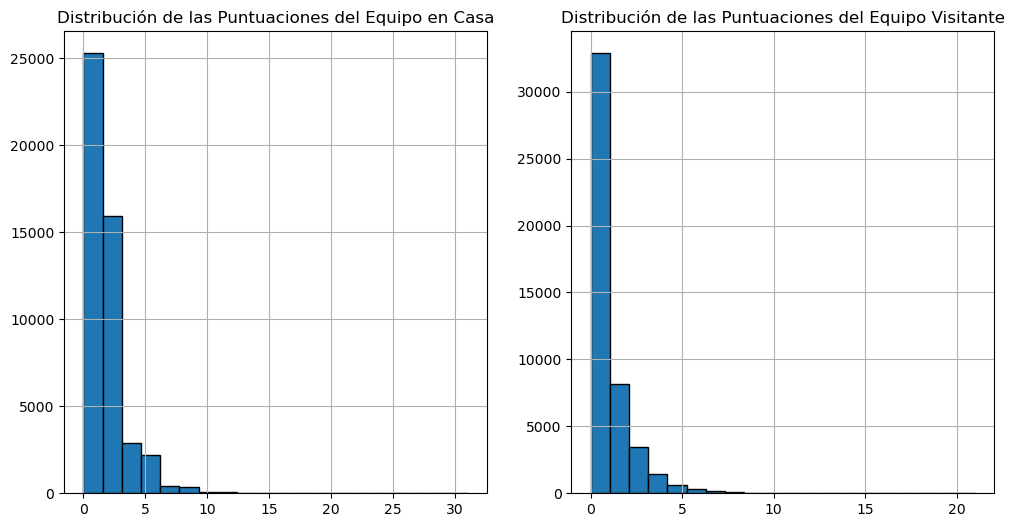

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
data['home_score'].hist(bins=20, edgecolor='black')
plt.title('Distribución de las Puntuaciones del Equipo en Casa')

plt.subplot(1, 2, 2)
data['away_score'].hist(bins=20, edgecolor='black')
plt.title('Distribución de las Puntuaciones del Equipo Visitante')

plt.show()


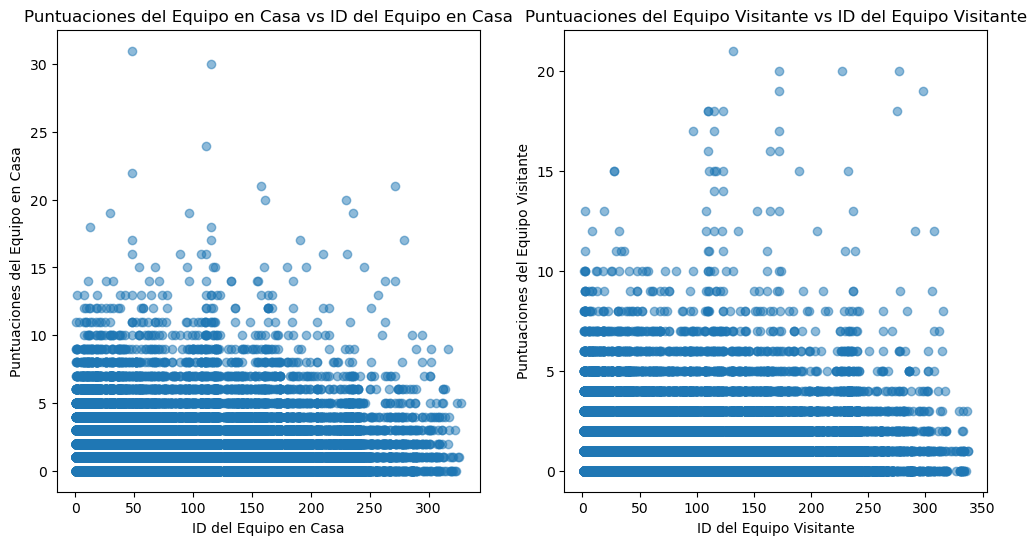

In [30]:
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data['home_team_id'], data['home_score'], alpha=0.5)
plt.title('Puntuaciones del Equipo en Casa vs ID del Equipo en Casa')
plt.xlabel('ID del Equipo en Casa')
plt.ylabel('Puntuaciones del Equipo en Casa')

plt.subplot(1, 2, 2)
plt.scatter(data['away_team_id'], data['away_score'], alpha=0.5)
plt.title('Puntuaciones del Equipo Visitante vs ID del Equipo Visitante')
plt.xlabel('ID del Equipo Visitante')
plt.ylabel('Puntuaciones del Equipo Visitante')

plt.show()

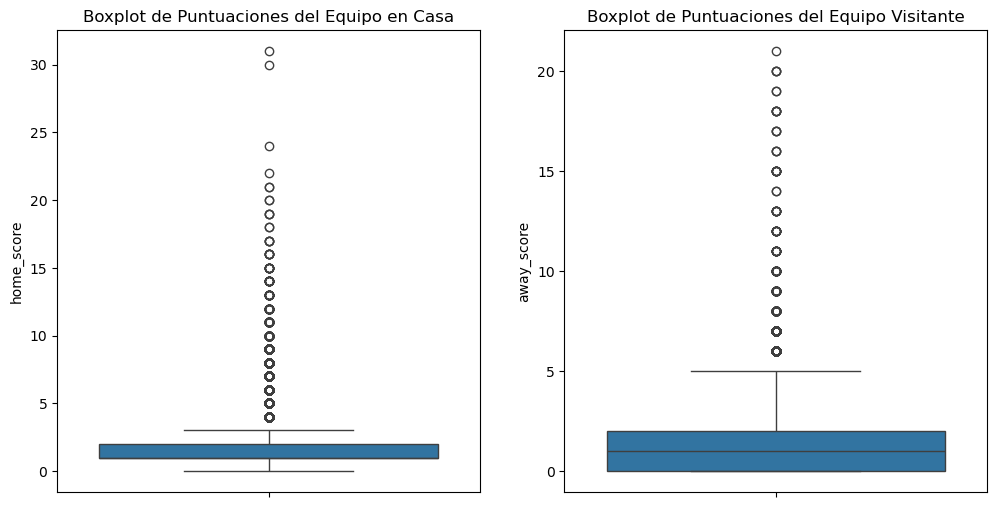

In [20]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=data['home_score'])
plt.title('Boxplot de Puntuaciones del Equipo en Casa')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['away_score'])
plt.title('Boxplot de Puntuaciones del Equipo Visitante')

plt.show()


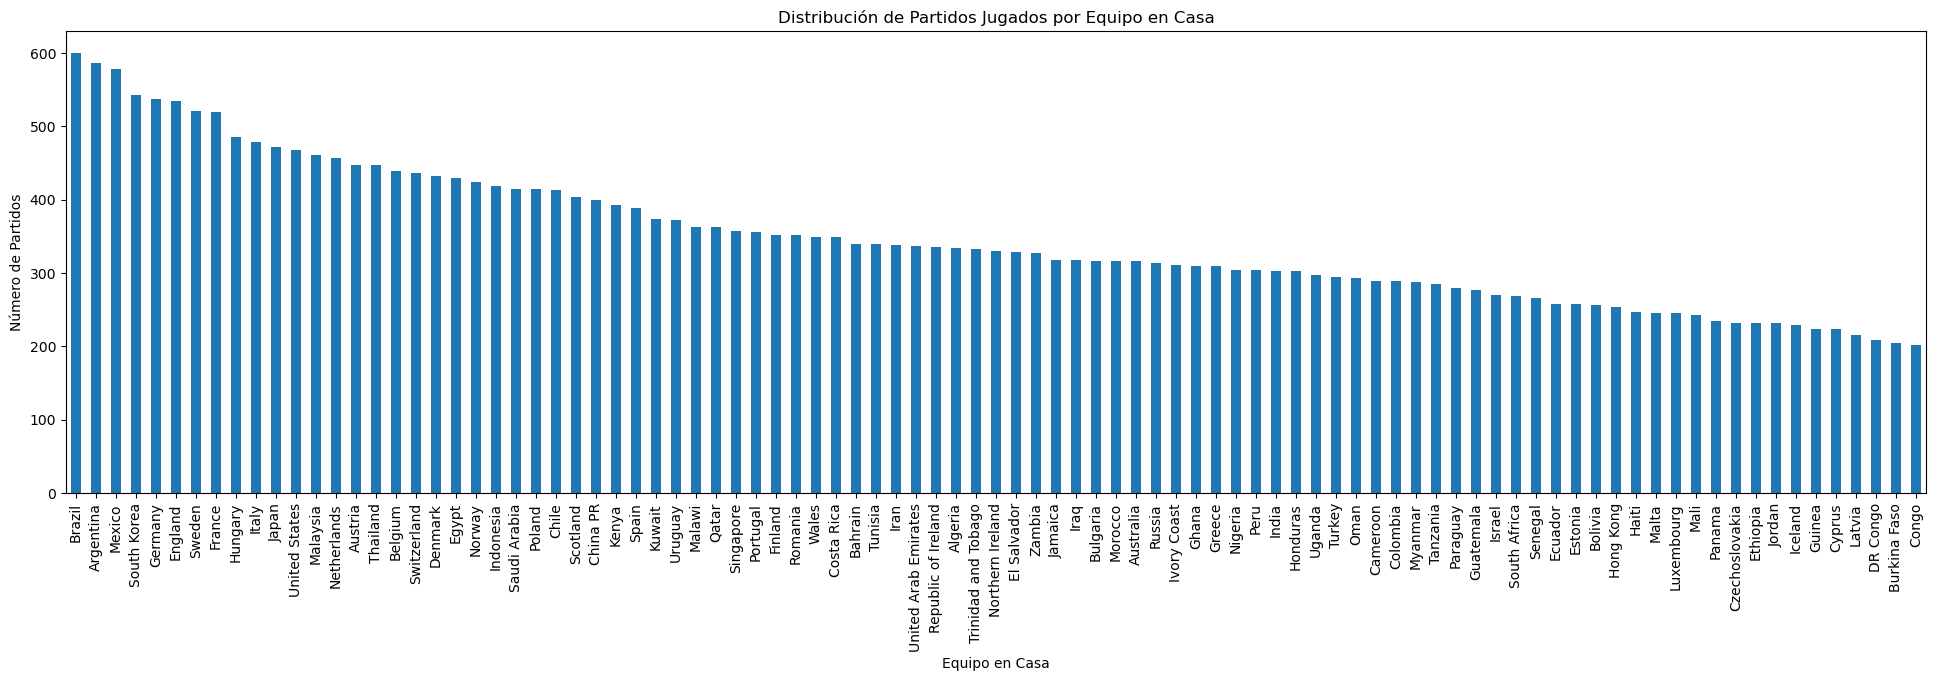

In [28]:
# Contar el número de partidos jugados por cada equipo en casa
home_team_counts = data['home_team'].value_counts()

# Filtrar equipos que han jugado al menos 200 partidos en casa
home_team_counts_filtered = home_team_counts[home_team_counts >= 200]

# Graficar la distribución
plt.figure(figsize=(24, 6))
home_team_counts_filtered.plot(kind='bar')
plt.title('Distribución de Partidos Jugados por Equipo en Casa')
plt.xlabel('Equipo en Casa')
plt.ylabel('Número de Partidos')

plt.show()

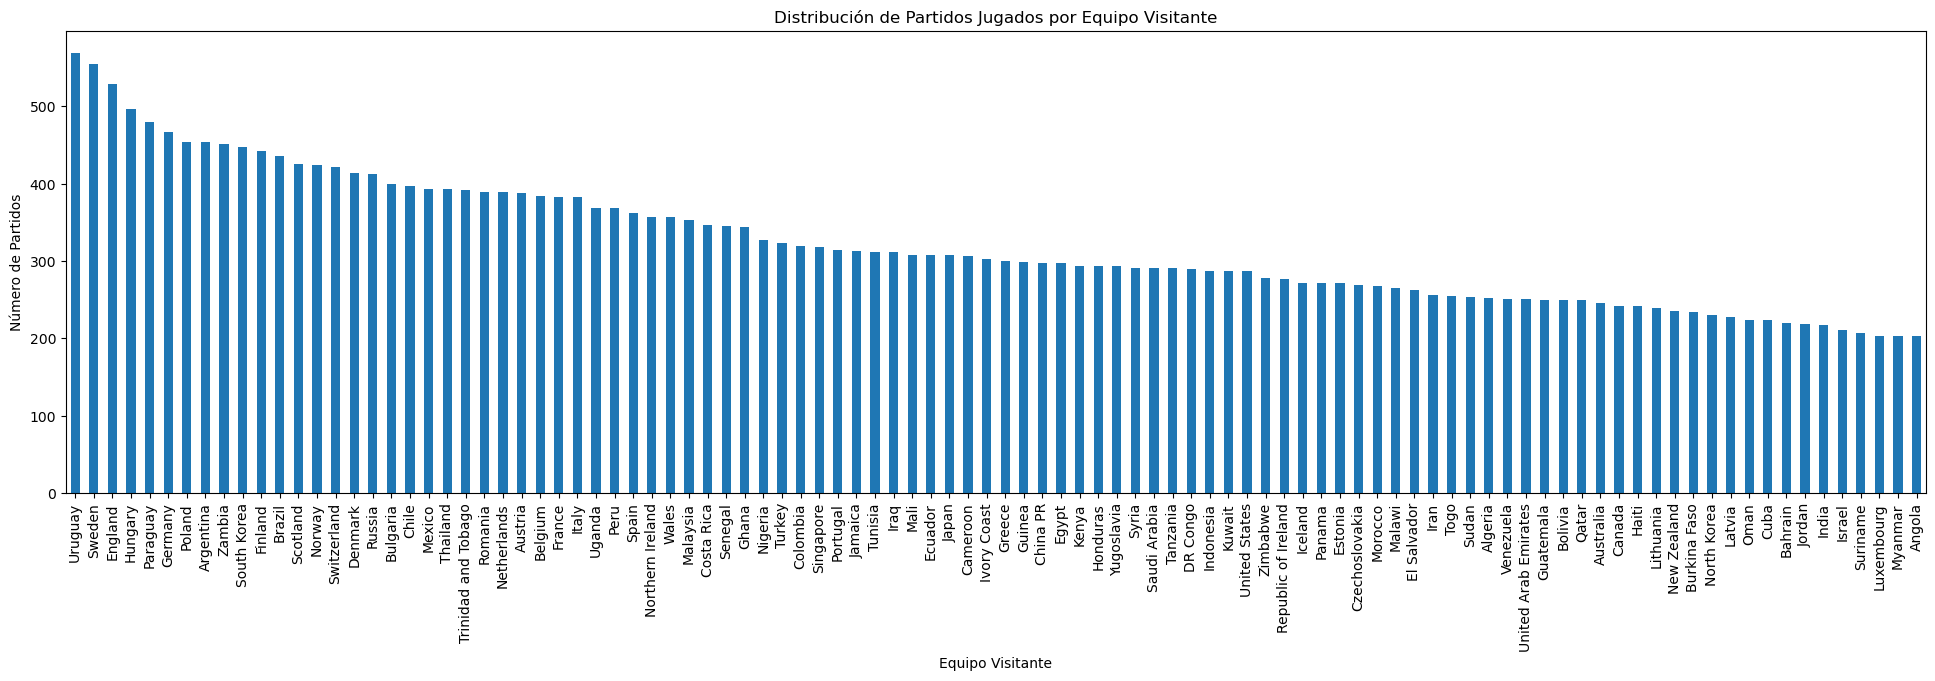

In [31]:
# Contar el número de partidos jugados por cada equipo en casa
away_team_counts = data['away_team'].value_counts()

# Filtrar equipos que han jugado al menos 200 partidos en casa
away_team_counts_filtered = away_team_counts[away_team_counts >= 200]

# Graficar la distribución
plt.figure(figsize=(24, 6))
away_team_counts_filtered.plot(kind='bar')
plt.title('Distribución de Partidos Jugados por Equipo Visitante')
plt.xlabel('Equipo Visitante')
plt.ylabel('Número de Partidos')

plt.show()


In [32]:
from scipy.stats import f_oneway

anova_result_home = f_oneway(*[group['home_score'].values for name, group in data.groupby('home_team')])
anova_result_away = f_oneway(*[group['away_score'].values for name, group in data.groupby('away_team')])

print('Resultado ANOVA para Puntuaciones del Equipo en Casa:', anova_result_home)
print('Resultado ANOVA para Puntuaciones del Equipo Visitante:', anova_result_away)
 

Resultado ANOVA para Puntuaciones del Equipo en Casa: F_onewayResult(statistic=9.674028880481574, pvalue=0.0)
Resultado ANOVA para Puntuaciones del Equipo Visitante: F_onewayResult(statistic=10.890758083414458, pvalue=0.0)
